In [18]:
import numpy as np
import pandas as pd
from statsForecastModels import * 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Monthly data

In [6]:
df = pd.read_csv('monthly sales date 10 store.csv')
df.head() 

,unique_id,ds,y
0,Store Store 1,2013-01-01,41077
1,Store Store 1,2013-02-01,41306
2,Store Store 1,2013-03-01,55827
3,Store Store 1,2013-04-01,61523
4,Store Store 1,2013-05-01,69272


In [7]:
df.nunique()

unique_id     10
ds            60
y            599
dtype: int64

In [13]:
df.nunique()

unique_id     10
ds            60
y            599
dtype: int64

In [15]:
df.describe(include='all').T 

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
unique_id,600,10,Store Store 1,60,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,600,60,2013-01-01 00:00:00,10,2013-01-01,2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,600.0,NaN,NaN,NaN,NaT,NaT,79507.52,23484.712007,31508.0,62025.0,77414.5,97127.25,150105.0


In [12]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'].min(), df['ds'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00'))

In [16]:
test_dt_cutoff = "2017-01-01"

In [17]:
train_df = df[df['ds']<test_dt_cutoff]
test_df  = df[df['ds']>=test_dt_cutoff]
train_df.sort_values(['unique_id','ds'],inplace=True, ignore_index=True)
test_df.sort_values(['unique_id','ds'],inplace=True, ignore_index=True)

In [25]:
train_df.describe(include='all').T 

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
unique_id,480,10,Store Store 1,48,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,480,48,2013-01-01 00:00:00,10,2013-01-01,2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,480.0,NaN,NaN,NaN,NaT,NaT,77022.441667,22525.058969,31508.0,60073.5,74429.5,93827.25,146393.0


In [26]:
test_df.describe(include='all').T 

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
unique_id,120,10,Store Store 1,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,120,12,2017-01-01 00:00:00,10,2017-01-01,2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,120.0,NaN,NaN,NaN,NaT,NaT,89447.833333,24684.873723,42754.0,70848.75,86363.0,107821.0,150105.0


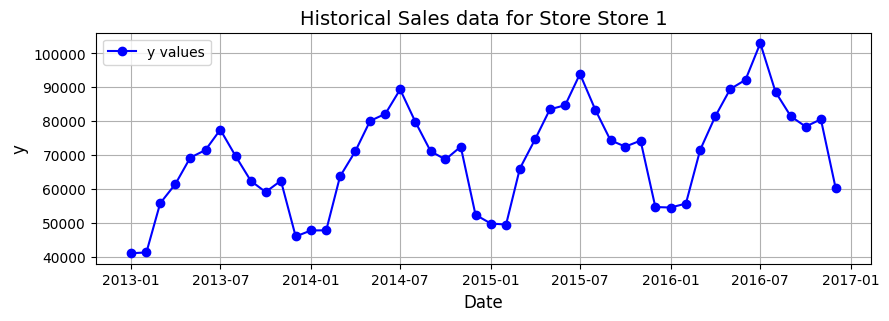

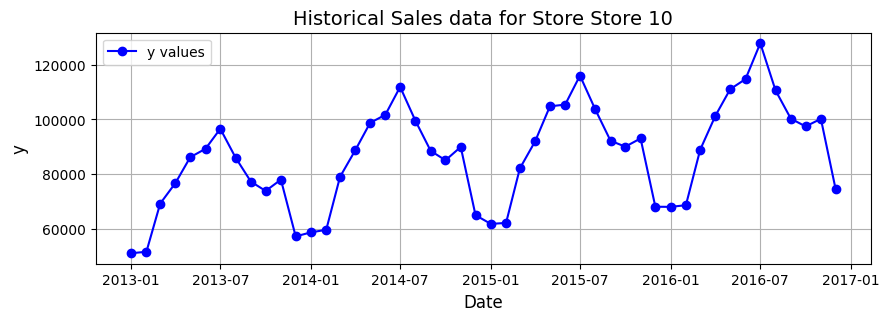

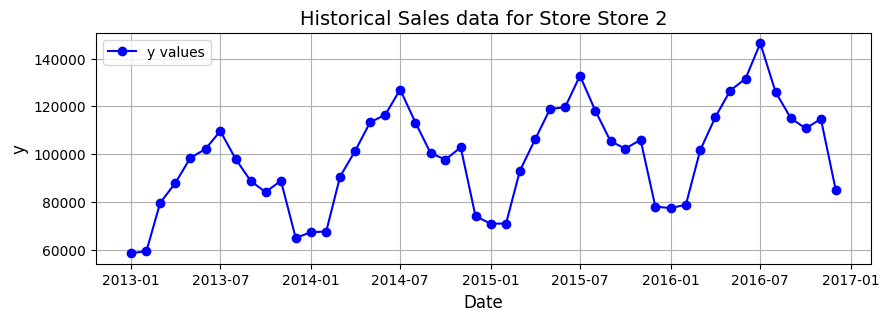

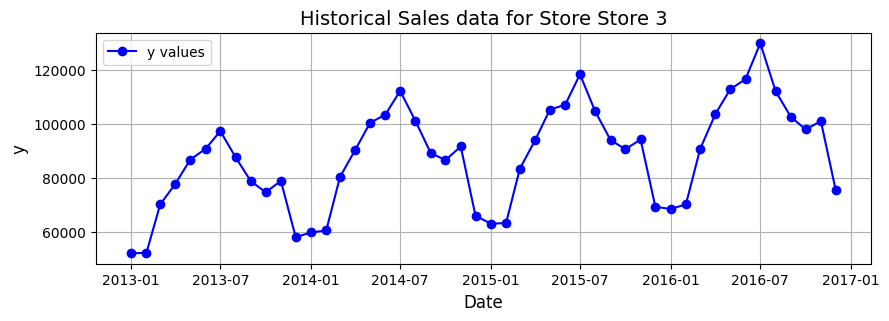

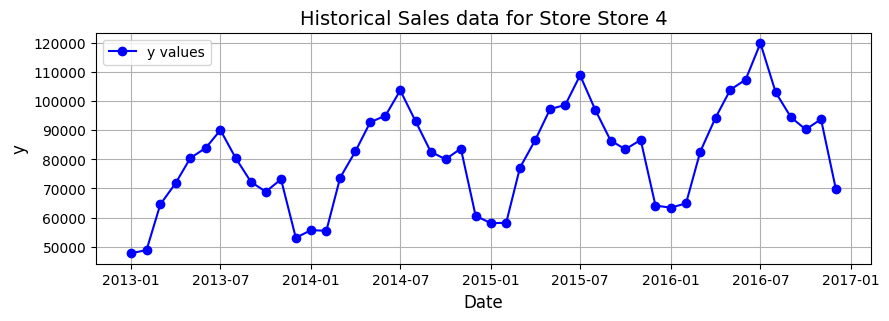

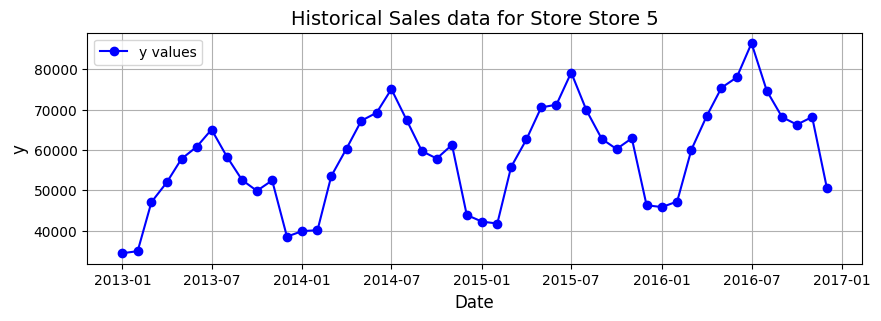

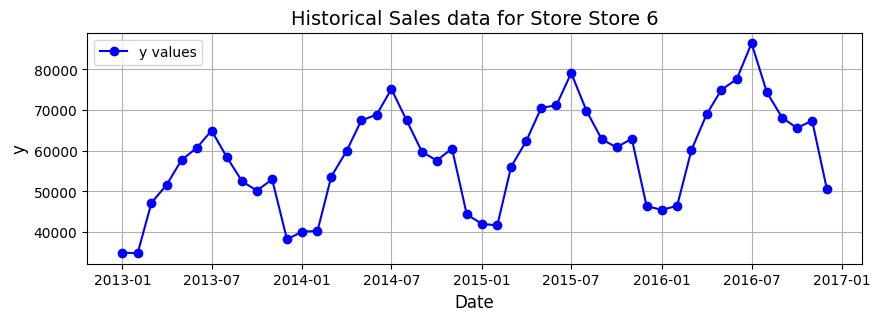

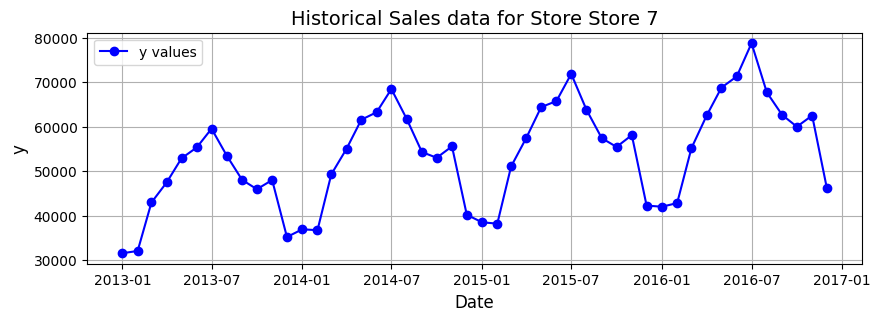

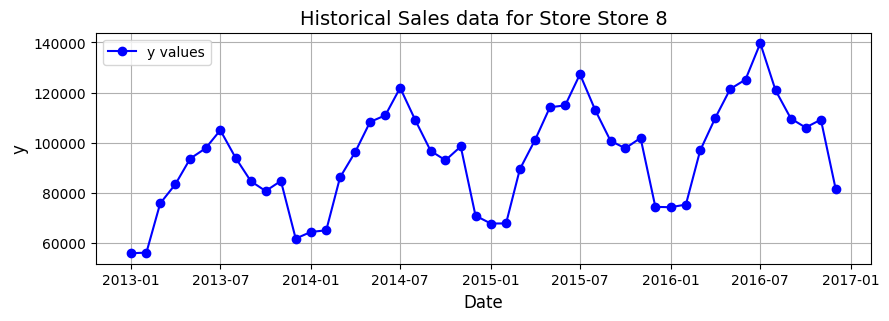

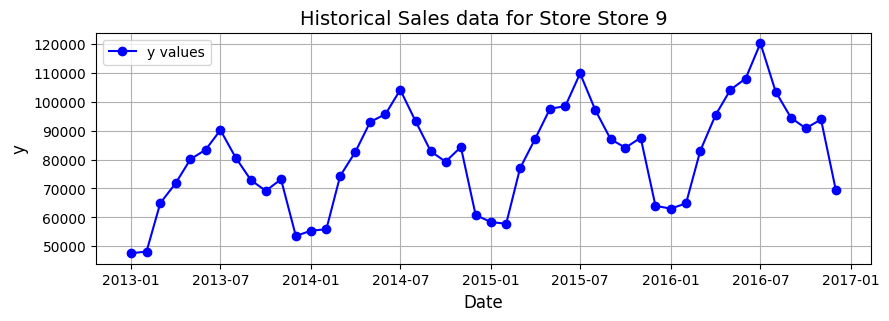

In [23]:
for store in train_df.unique_id.unique():
    temp = train_df[train_df['unique_id']==store]
    plt.figure(figsize=(10, 3))
    plt.plot(temp['ds'], temp['y'], marker='o', linestyle='-', color='b', label='y values')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'Historical Sales data for {store}', fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()

In [24]:
model_type = ['all']
seasonal_length = 12
data_frequency = find_data_frequency(df,'YYYY-MM-DD',seasonal_length)
date_format = 'YYYY-MM-DD'
stats = StatsForecastModels(
    model_type=model_type,
    seasonal_length=seasonal_length,
    freq=data_frequency,
    date_format=date_format,
    )

stats.fit(train_df)
forecast_horizon = test_df.ds.nunique()
ignore_neg_fcsts = True 
df_pred = stats.predict(horizon=forecast_horizon, ignore_neg_fcsts=ignore_neg_fcsts)
error_metric = 'mape'
df_crossval = stats.crossvalidation(error_metric=error_metric)
df_performance = evaluate_cross_validation(df_crossval, error_metric)

{'AutoCES', 'AutoTheta', 'SeasonalExponentialSmoothingOptimized', 'SeasonalWindowAverage', 'AutoARIMA', 'HoltWinters', 'RandomWalkWithDrift', 'AutoETS', 'AutoRegressive', 'Holt', 'SeasonalNaive'}
{'AutoCES', 'AutoTheta', 'SeasonalExponentialSmoothingOptimized', 'SeasonalWindowAverage', 'AutoARIMA', 'HoltWinters', 'RandomWalkWithDrift', 'AutoETS', 'AutoRegressive', 'SeasonalNaive'}
%Y-%m-%d ----------------------------


In [27]:
print(df_pred.shape)
df_pred = pd.merge(test_df, df_pred, on =['unique_id', 'ds'])
print(df_pred.shape)
df_pred.head()

(120, 13)
(120, 14)


,unique_id,ds,y,AutoCES,AutoTheta,SeasonalExponentialSmoothingOptimized,SeasonalWindowAverage,AutoARIMA,HoltWinters,RandomWalkWithDrift,AutoETS,AutoRegressive,SeasonalNaive,stats_ensemble
0,Store Store 1,2017-01-01,56086,60078.085938,59319.398438,54511.617188,54559.0,60104.0,62853.339844,60653.851562,58227.687500,60475.898438,54559.0,58534.195312
1,Store Store 1,2017-02-01,56098,60633.089844,59458.316406,55659.902344,55722.0,61267.0,63079.531250,61061.703125,58058.007812,62915.910156,55722.0,59357.742188
2,Store Store 1,2017-03-01,74037,76561.460938,78136.437500,71509.671875,71565.0,77110.0,78652.515625,61469.554688,75984.242188,78516.437500,71565.0,74107.031250
3,Store Store 1,2017-04-01,85338,85623.484375,88053.046875,81488.078125,81557.0,87102.0,86640.695312,61877.406250,85015.945312,85781.515625,81557.0,82469.609375
4,Store Store 1,2017-05-01,92248,93081.820312,97920.304688,89441.859375,89502.0,95047.0,95032.640625,62285.253906,94035.593750,96209.156250,89502.0,90205.765625


[]

In [40]:
import plotly.graph_objects as go
import plotly.io as pio

for store in df_pred['unique_id'].unique():
    # Filter data for the specific store
    temp = df_pred[df_pred['unique_id'] == store]

    # Identify prediction models
    models = temp.columns.tolist()
    models.remove('unique_id')
    models.remove('ds')
    models.remove('y')

    # Create the Plotly figure
    fig = go.Figure()

    # Add the actual values trace
    fig.add_trace(go.Scatter(
        x=temp['ds'],
        y=temp['y'],
        mode='lines+markers',
        name='Actual (y)',
        line=dict(color='black', width=2)
    ))

    # Add traces for each prediction model
    for model in models:
        fig.add_trace(go.Scatter(
            x=temp['ds'],
            y=temp[model],
            mode='lines+markers',
            name=model,
            line=dict(dash='dash')
        ))

    # Customize layout
    fig.update_layout(
        title=f"Actual vs Predicted Values for {store}",
        xaxis_title='Date',
        yaxis_title='Values',
        legend=dict(
            x=1.05,
            y=1,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(0, 0, 0, 0)'
        ),
        margin=dict(l=50, r=200, t=50, b=50),
        template='plotly_white'
    )
    output_filename = f"{store}_actual_vs_predicted.html"
    pio.write_html(fig, file=output_filename, auto_open=False)
    fig.show()

In [30]:
tempEval = train_df.copy(deep=True)
tempEval['y+1'] = tempEval.groupby('unique_id')['y'].shift(-1)
tempEval.dropna(inplace=True)

def eval_metrics(df_pred):
    models = df_pred.columns.tolist()
    models.remove('unique_id')
    models.remove('ds')
    models.remove('y')
    temp_res = {}
    temp_res['metrics'] = ['RMSE', 'MAPE', 'R2']
    for model in models:
        rmseEM = np.sqrt(((df_pred['y'] - df_pred[model]) ** 2).mean())
        mapeEM = (np.abs((df_pred['y'] - df_pred[model]) / df_pred['y'])).mean() * 100
        r2 = r2_score(df_pred['y'], df_pred[model])
        temp_res[model] = [rmseEM, mapeEM, r2]
    dfEval = pd.DataFrame(temp_res)
    return dfEval

dfEval = eval_metrics(df_pred)

In [31]:
df_performance   # training data model performance at store level

,best_model,AutoARIMA,AutoRegressive,SeasonalExponentialSmoothingOptimized,AutoTheta,AutoETS,SeasonalWindowAverage,AutoCES,RandomWalkWithDrift,HoltWinters,SeasonalNaive,stats_ensemble
unique_id,,,,,,,,,,,,
Store Store 1,AutoCES,0.032538,0.051248,0.142453,0.243278,0.061807,0.063397,0.019924,0.322441,0.032475,0.063397,0.047217
Store Store 10,AutoCES,0.023131,0.051481,0.143285,0.244051,0.056182,0.061916,0.019983,0.323336,0.033214,0.061916,0.046962
Store Store 2,AutoCES,0.032482,0.051965,0.143732,0.239024,0.060930,0.063531,0.018679,0.315451,0.031033,0.063531,0.045941
Store Store 3,AutoCES,0.038372,0.053590,0.143892,0.245211,0.061463,0.063273,0.019509,0.323865,0.032792,0.063273,0.047373
Store Store 4,AutoCES,0.020282,0.049156,0.143631,0.245754,0.058437,0.061935,0.018954,0.325709,0.031919,0.061935,0.047578
Store Store 5,AutoCES,0.030918,0.052696,0.144106,0.243002,0.061010,0.062872,0.017279,0.321071,0.034526,0.062872,0.046537
Store Store 6,AutoCES,0.025479,0.050444,0.142505,0.242995,0.056071,0.062757,0.020689,0.320383,0.031845,0.062757,0.047445
Store Store 7,AutoCES,0.021277,0.049621,0.142512,0.250457,0.055607,0.063215,0.017729,0.332084,0.031843,0.063215,0.045451
Store Store 8,AutoCES,0.022761,0.051426,0.144063,0.242607,0.059495,0.061173,0.018334,0.320456,0.033129,0.061173,0.045972


In [32]:
dfEval   # validation data performance

,metrics,AutoARIMA,AutoRegressive,SeasonalExponentialSmoothingOptimized,AutoTheta,AutoETS,SeasonalWindowAverage,AutoCES,RandomWalkWithDrift,HoltWinters,SeasonalNaive,stats_ensemble
0,RMSE,4543.303287,3444.207007,5675.123849,2662.213056,2324.755175,5632.538821,4741.877770,29915.807735,3814.626194,5632.538821,4299.411616
1,MAPE,4.867014,3.669761,5.464893,2.496745,2.172809,5.404175,5.065088,33.530585,3.691766,5.404175,4.152116
2,R2,0.964206,0.979429,0.944151,0.987710,0.990628,0.944986,0.961009,-0.551915,0.974767,0.944986,0.967946
